# Linear Regression

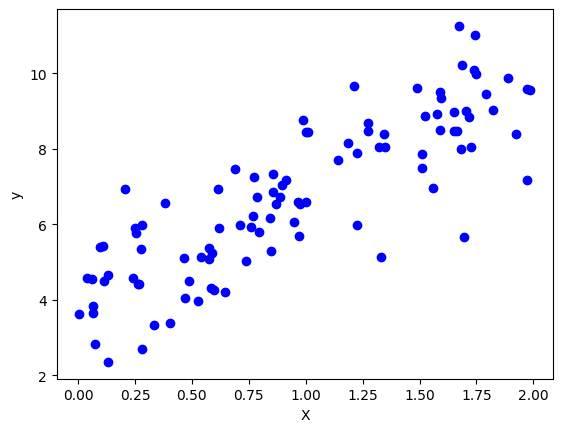

In [1]:
import numpy as np
import matplotlib.pyplot as plt

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "bo")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [2]:
X_b = np.c_[np.ones((100, 1)), X]

In [3]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.90970746],
       [2.95386644]])

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]

y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.90970746],
       [9.81744035]])

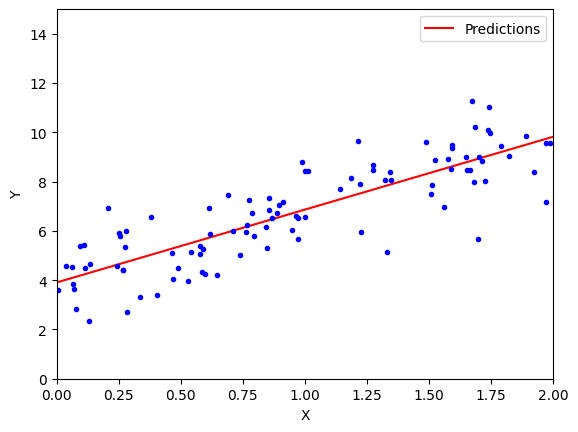

In [5]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

In [6]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [7]:
print("Constant: ", lin_reg.intercept_[0])
print("Coeficients: ", lin_reg.coef_[0])
print("Prediction: ", lin_reg.predict(X_new))

Constant:  3.909707461795044
Coeficients:  [2.95386644]
Prediction:  [[3.90970746]
 [9.81744035]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.90970746],
       [2.95386644]])

In [9]:
np.linalg.pinv(X_b).dot(y)

array([[3.90970746],
       [2.95386644]])

# Gradient Descent

In [10]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)

for iter in range(n_iterations):
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradient

theta

array([[3.90970746],
       [2.95386644]])

In [11]:
def gradient_descent(X_b, y, eta, n_iterations, m, axis):    
    theta = np.random.randn(2, 1)
    
    for iter in range(n_iterations):
        gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        x = np.arange(0, 4)
        axis.plot(x, theta[0] + x * theta[1], "r-")
        theta = theta - eta * gradient
    
    return theta

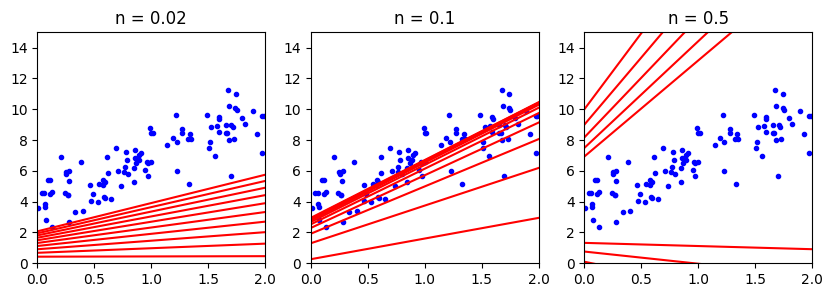

In [12]:
N_ITERATIONS = 10
M = 100

fig, ns = plt.subplots(nrows=1, ncols=3)
ns[0].axis([0, 2, 0, 15])
ns[0].set_title("n = 0.02")

ns[0].plot(X, y, "b.")
gradient_descent(X_b, y, 0.02, N_ITERATIONS, M, ns[0])

ns[1].axis([0, 2, 0, 15])
ns[1].set_title("n = 0.1")

ns[1].plot(X, y, "b.")
gradient_descent(X_b, y, 0.1, N_ITERATIONS, M, ns[1])

ns[2].axis([0, 2, 0, 15])
ns[2].set_title("n = 0.5")

ns[2].plot(X, y, "b.")
gradient_descent(X_b, y, 0.5, N_ITERATIONS, M, ns[2])

fig.set_figwidth(10)
fig.set_figheight(3)
plt.show()

### Stochastic Gradient Descent

In [13]:
n_epochs = 50
t0, t1 = 5, 50 # Learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(M):
        rand_id = np.random.randint(M)
        xi = X_b[rand_id:rand_id + 1]
        yi = y[rand_id:rand_id + 1]

        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * M + i)
        theta = theta - eta * gradients

theta

array([[3.8478336 ],
       [3.00438174]])

In [14]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [15]:
print("Constant: ", sgd_reg.intercept_[0])
print("Coeficients: ", sgd_reg.coef_[0])
print("Prediction: ", sgd_reg.predict(X_new))

Constant:  3.8955950484444415
Coeficients:  2.950249733465572
Prediction:  [3.89559505 9.79609452]


### Polynomial Gradient Descent

In [16]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

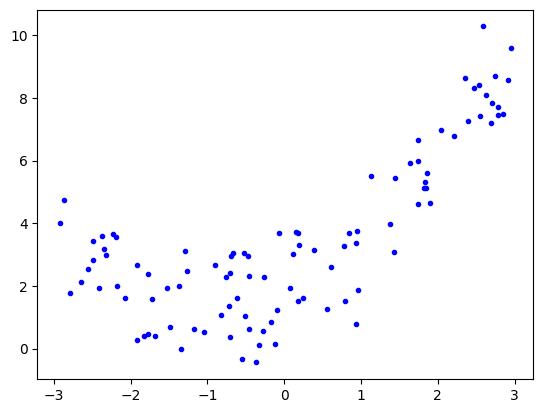

In [17]:
plt.plot(X, y, "b.")
plt.show()

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

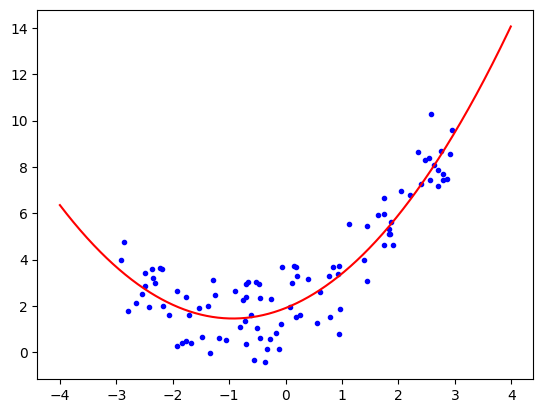

(array([1.90804382]), array([[0.97011634, 0.52016326]]))

In [19]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

plt.plot(X, y, "b.")

x = np.arange(-4, 4, 0.01)
plt.plot(x, lin_reg.intercept_ + lin_reg.coef_[0][0] * x + lin_reg.coef_[0][1] * x ** 2, "r-")
plt.show()

lin_reg.intercept_, lin_reg.coef_

### Learning Curve

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []

    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Val")
    plt.axis([0, 80, 0, 3])
    plt.legend()

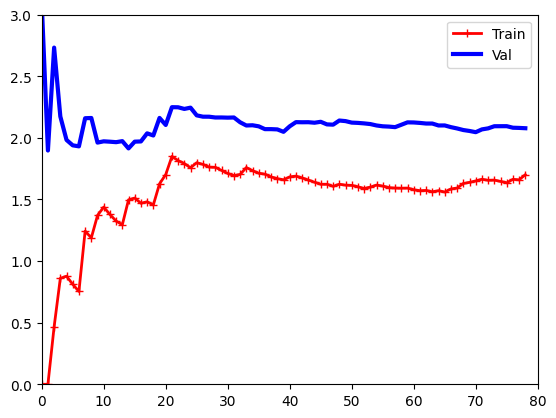

In [24]:
lin_reg = LinearRegression()
plot_learning_curve(lin_reg, X, y)

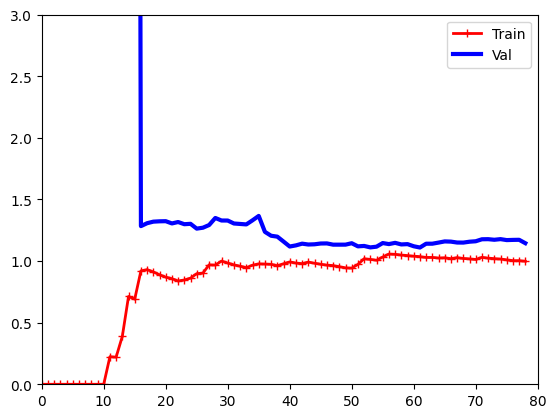

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])

plot_learning_curve(polynomial_regression, X, y)

### Ridge Regression

In [29]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.06733134]])

In [30]:
sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([5.07322119])

### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.02286806])

### Elastic Net

In [32]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.02140178])

### Early Stopping

In [61]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
    ("poly_transformer", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])

new_y = y.ravel()

X_train, X_val, y_train, y_val = train_test_split(X, new_y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd_reg = SGDRegressor(max_iter=1000, tol=0, warm_start=True,
                       penalty=None,
                       eta0=0.0005, learning_rate="constant")

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)

    if val_error < minimum_val_error:
        best_epoch = epoch
        best_model = clone(sgd_reg)
        minimum_val_error = val_error

### Logistic Regression - Iris Dataset

In [62]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [71]:
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.uint8) # 1 if Iris virginica

In [72]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

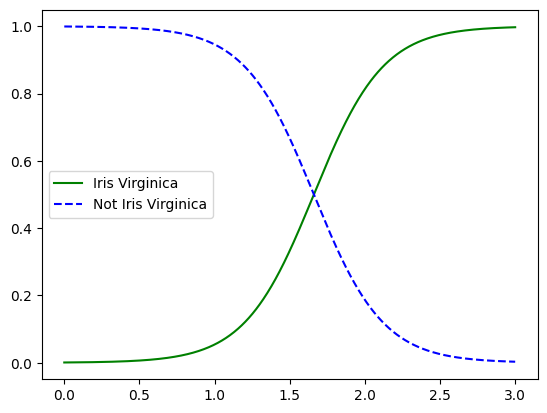

In [88]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris Virginica")
plt.legend(loc="center left");

### Softmax Regression

In [90]:
X = iris["data"][:, (2, 3)] # Petal length, width
y = iris["target"]

In [91]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial')

In [94]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


# Exercise - Batch GD with early stopping for Softmax Regression

In [98]:
np.random.seed(42)

X = iris["data"][:, (2, 3)] # Petal length, width
y = iris["target"]

In [99]:
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [102]:
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_id = np.random.permutation(total_size)

X_train = X_with_bias[rnd_id[:train_size]]
y_train = y[rnd_id[:train_size]]
X_valid = X_with_bias[rnd_id[train_size:-test_size]]
y_valid = y[rnd_id[train_size:-test_size]]
X_test = X_with_bias[rnd_id[-test_size:]]
y_test = y[rnd_id[-test_size:]]

In [108]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [109]:
y_train_one_hot = to_one_hot(y_train)
y_test_one_hot = to_one_hot(y_test)
y_valid_one_hot = to_one_hot(y_valid)

In [111]:
def softmax(logits):
    exps = np.exp(logits)
    exps_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exps_sums

In [116]:
n_inputs = X_train.shape[1]
n_outputs = len(np.unique(y_train))

In [121]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iter in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iter % 500 == 0:
        loss = -np.mean(np.sum(y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iter, loss)
    error = Y_proba - y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 4.162334973735731
500 0.7610934359185408
1000 0.6260228542020443
1500 0.5484331110580061
2000 0.498041163140187
2500 0.46213725675423445
3000 0.4348106568013086
3500 0.41300348774477547
4000 0.39498470472964853
4500 0.3797002224229307
5000 0.366469282005813


In [122]:
Theta

array([[ 4.15892088, -0.07456872, -2.10312064],
       [-0.37221314,  1.07194988,  0.78945832],
       [-0.86008346, -0.38430771,  1.85005788]])

In [123]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

0.9333333333333333